## Topic: Agricultural commodity Prices Prediction.

---
---
### Team Number : 14




*1.   Sai Kiran Mohanty  --> 2341013236*

*2.  Aditya Kumar Das   --> 2341004026*

*3.  Chidananda Sahoo  --> 2341019123*

---
---
##  Part 1 : EDA
---
---




In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/CropComodity_PricePrediction/Unprocessed_Data/Price_Agriculture_commodities_Week.csv")

In [ ]:
print('rows----> ',df.shape[0])
print('columns----> ',df.shape[1])

rows---->  23093
columns---->  10


In [ ]:
df.isnull().sum()

,0
State,0
District,0
Market,0
Commodity,0
Variety,0
Grade,0
Arrival_Date,0
Min Price,0
Max Price,0
Modal Price,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23093 entries, 0 to 23092
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   State         23093 non-null  object        
 1   District      23093 non-null  object        
 2   Market        23093 non-null  object        
 3   Commodity     23093 non-null  object        
 4   Variety       23093 non-null  object        
 5   Grade         23093 non-null  object        
 6   Arrival_Date  23093 non-null  datetime64[ns]
 7   Min Price     23093 non-null  float64       
 8   Max Price     23093 non-null  float64       
 9   Modal Price   23093 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(6)
memory usage: 1.8+ MB


In [ ]:
df.describe()

,Arrival_Date,Min Price,Max Price,Modal Price
count,23093,23093.000000,23093.000000,23093.000000
mean,2023-07-30 07:34:38.499978496,4187.077045,4976.034260,4602.917742
min,2023-07-27 00:00:00,0.000000,0.000000,0.830000
25%,2023-07-29 00:00:00,1750.000000,2000.000000,1955.000000
50%,2023-07-31 00:00:00,2725.000000,3400.000000,3000.000000
75%,2023-08-01 00:00:00,5000.000000,6000.000000,5500.000000
max,2023-08-02 00:00:00,223500.000000,227500.000000,225500.000000
std,NaN,5472.783385,6277.308057,5843.822711


In [ ]:
df

,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min Price,Max Price,Modal Price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,27-07-2023,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,27-07-2023,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,27-07-2023,8400.0,9000.0,8850.0
...,...,...,...,...,...,...,...,...,...,...
23088,Uttrakhand,Haridwar,Roorkee,Mango,Other,Medium,02-08-2023,800.0,1200.0,1000.0
23089,Uttrakhand,Haridwar,Roorkee,Mousambi(Sweet Lime),Other,Medium,02-08-2023,1500.0,2500.0,2000.0
23090,Uttrakhand,Haridwar,Roorkee,Pear(Marasebu),Other,Medium,02-08-2023,2000.0,3000.0,2500.0
23091,Uttrakhand,Haridwar,Roorkee,Potato,Other,FAQ,02-08-2023,900.0,1800.0,1500.0


In [ ]:
def cat_analysis(df,col, dpi=100 , top=15):
    plt.figure(figsize=(10, 6), dpi=dpi)
    value_counts = df[col].value_counts()
    value_counts[:top].plot.bar()
    plt.xlabel(f"{col}")
    plt.ylabel('Count')
    plt.title(f'Frequency of Top {top} {col}')
    plt.show()


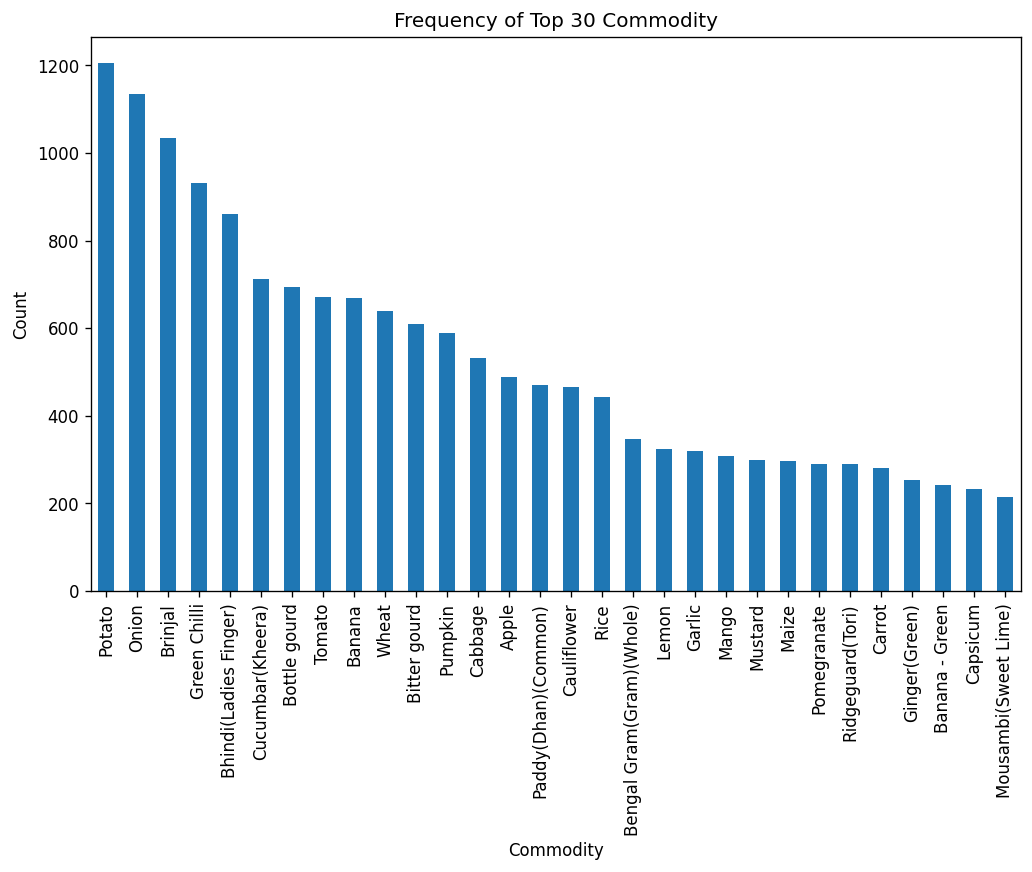

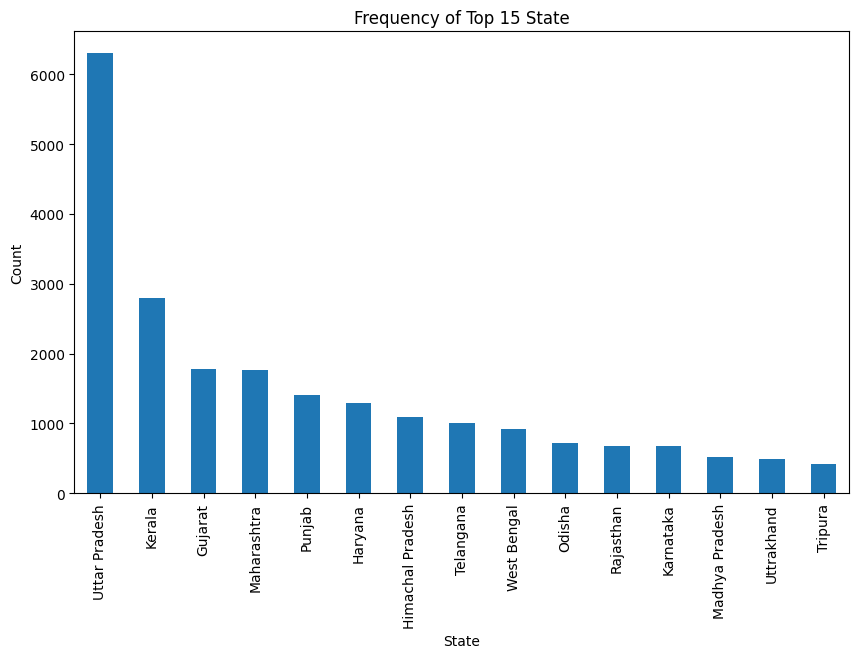

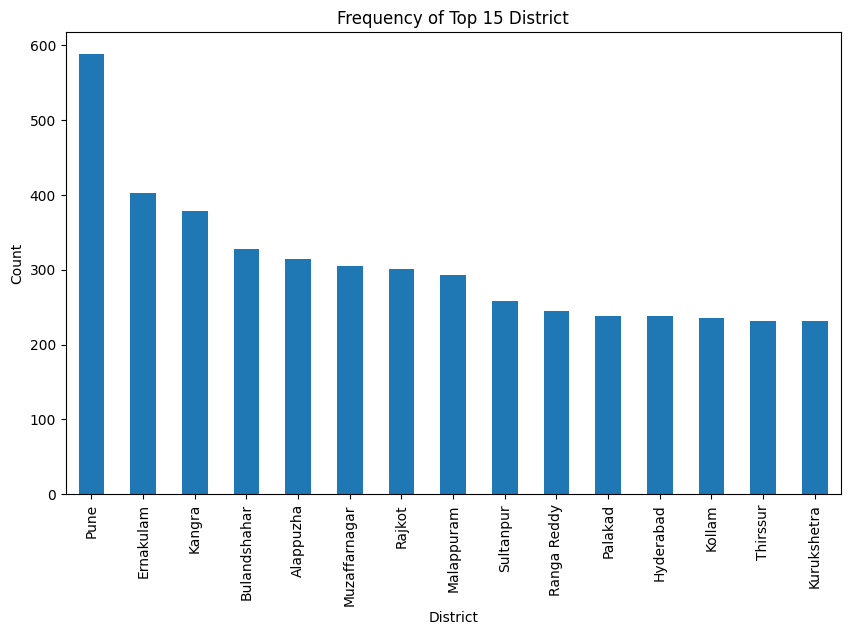

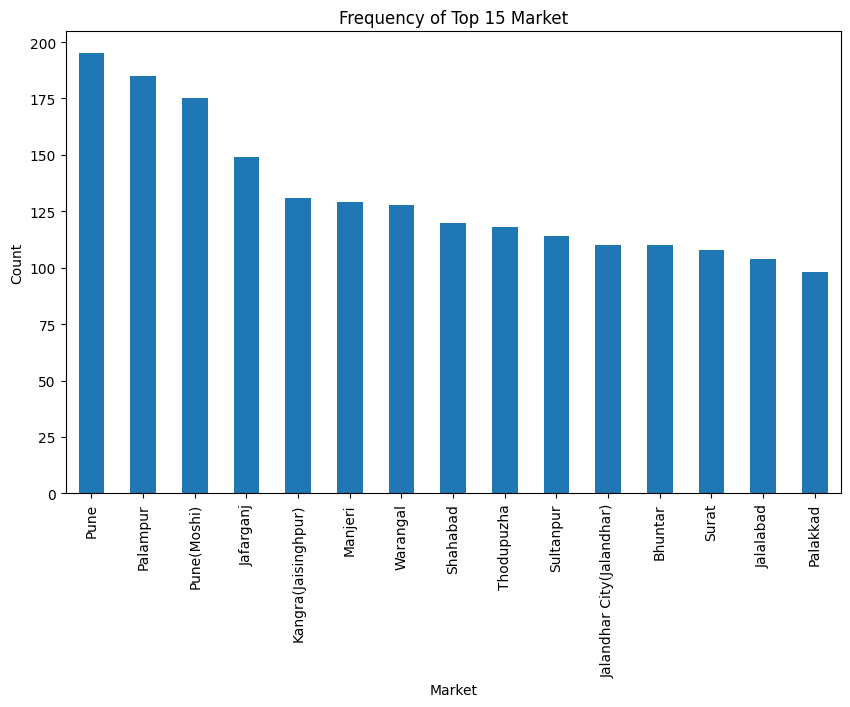

In [ ]:
cat_analysis(df,'Commodity', dpi=120 , top=30)
cat_analysis(df,'State')
cat_analysis(df,'District')
cat_analysis(df,'Market')

In [ ]:
def num_analysis(df,col, dpi=100):
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=10, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

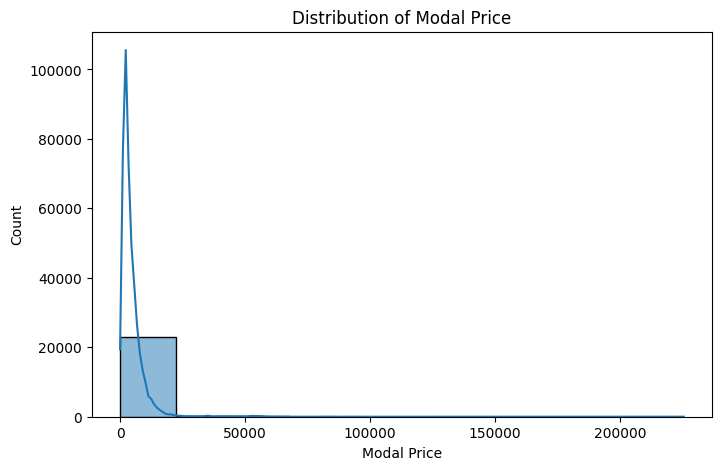

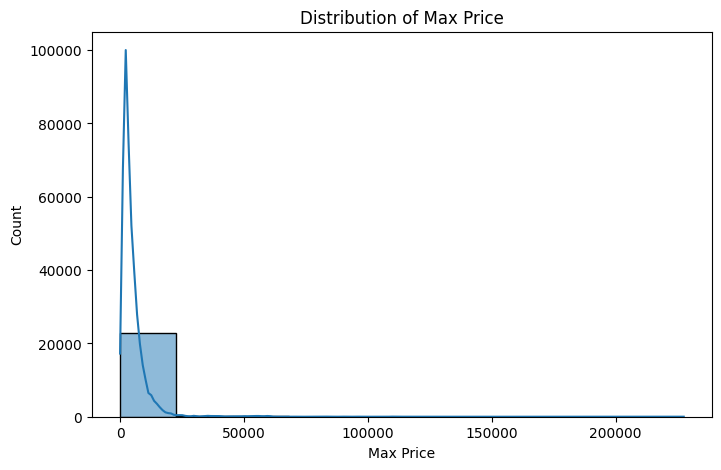

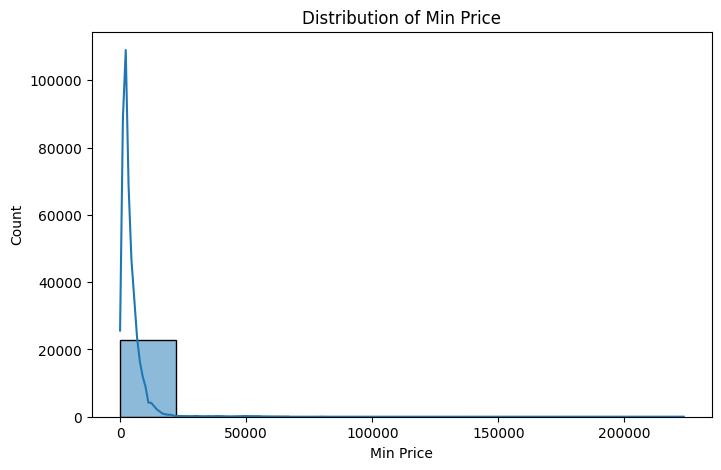

In [ ]:

num_analysis(df,'Modal Price')
num_analysis(df,'Max Price')
num_analysis(df,'Min Price')

In [ ]:
def num_box_plt(df,col, dpi=120):
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


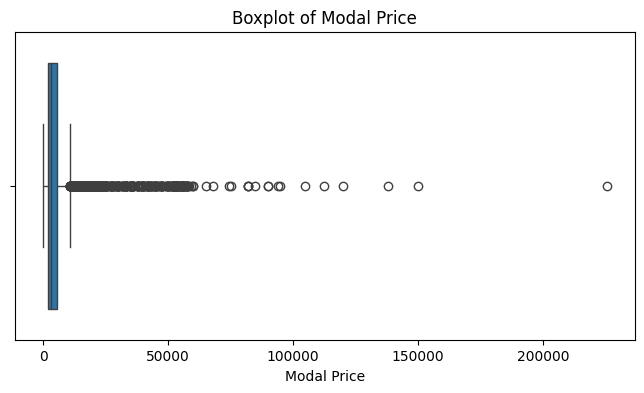

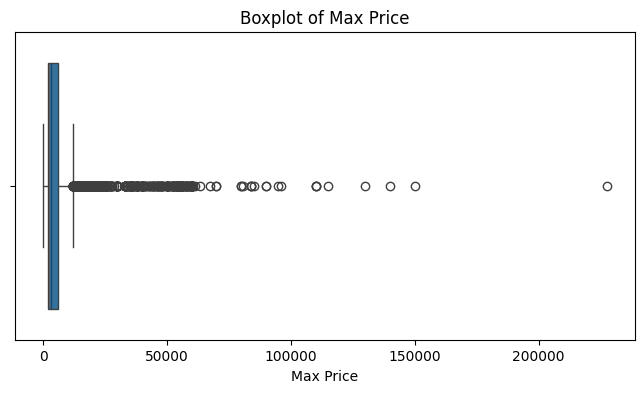

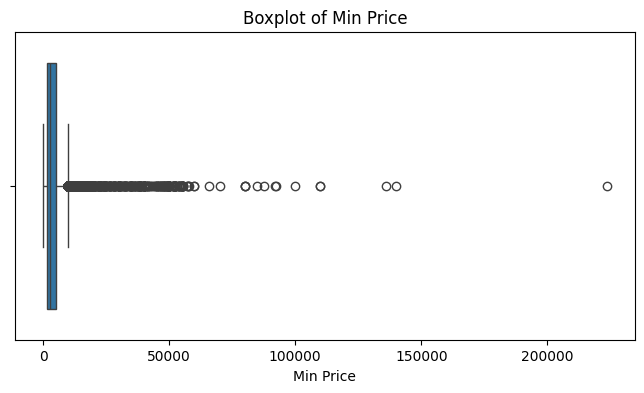

In [ ]:
num_box_plt(df,'Modal Price')
num_box_plt(df,'Max Price')
num_box_plt(df,'Min Price')

In [ ]:
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d-%m-%Y')


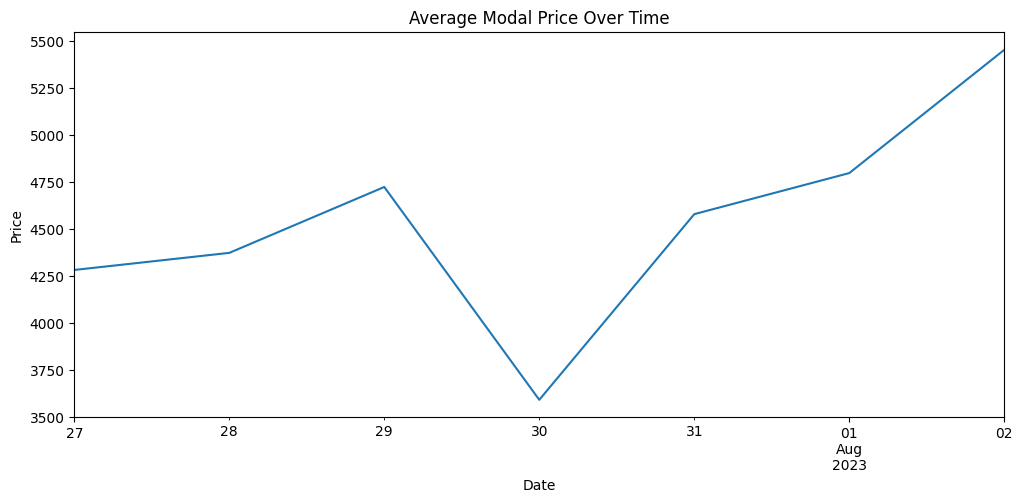

In [ ]:
plt.figure(figsize=(12,5))
df.groupby('Arrival_Date')['Modal Price'].mean().plot()

plt.title('Average Modal Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
def box_plt(df,col, dpi=120):
    top = df[col].value_counts().head(6).index
    plt.figure(figsize=(10,5))
    sns.boxplot(data=df[df[col].isin(top)], x=col, y='Modal Price')
    plt.xticks(rotation=45)
    plt.title(f'{col}-wise Modal Price Distribution')
    plt.show()

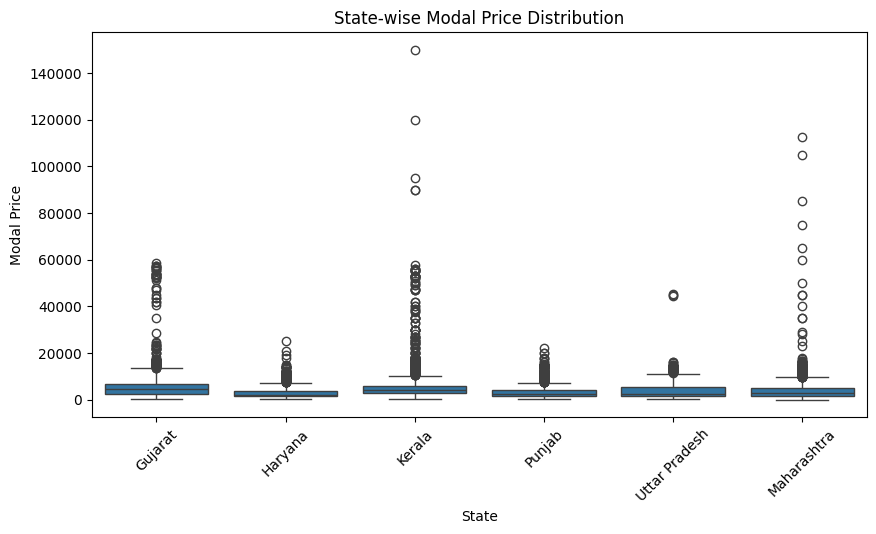

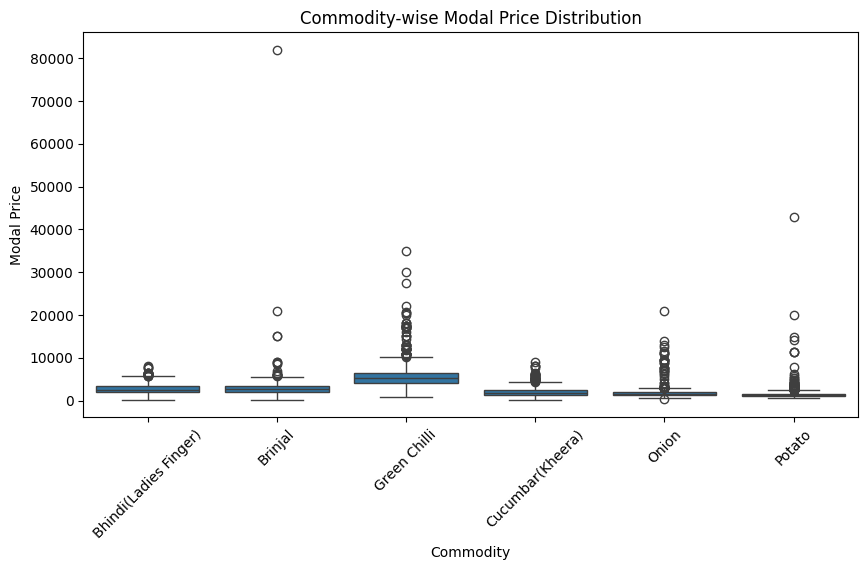

In [ ]:
box_plt(df,'State')
box_plt(df,'Commodity')

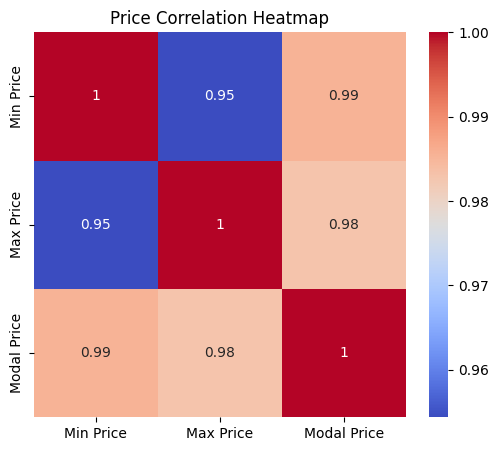

In [ ]:
plt.figure(figsize=(6,5))
sns.heatmap(
    df[['Min Price','Max Price','Modal Price']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Price Correlation Heatmap')
plt.show()
